# Logical vs physical Qubits needed by annealing
This notebook contains the code for the plots that visualize the number of qubits needed by the D-Wave devices to embed the Knapsack scenarios.

In [1]:

import matplotlib.pyplot as plt
import pandas as pd
import json
import seaborn as sns

In [2]:
sns.set_style("whitegrid")

In [3]:
with open("qubits_needed.json") as f:
    data = json.load(f)

In [4]:
df = pd.DataFrame.from_dict(data)

In [5]:
def label_scen(row):
   if row['logical_qubits'] == 12 :
      return 1
   if row['logical_qubits'] == 14 :
      return 2
   if row['logical_qubits'] == 16 :
      return 3
   if row['logical_qubits'] == 19 :
      return 4
   if row['logical_qubits'] == 23 :
      return 5
   if row['logical_qubits'] == 27 :
      return 6
   if row['logical_qubits'] == 31 :
      return 7
   if row['logical_qubits'] == 36 :
      return 8
   if row['logical_qubits'] == 42 :
      return 9
df['scenario'] = df.apply (lambda row: label_scen(row), axis=1)

In [6]:
df['type'] = df['type'].replace({ 'DW_2000Q_6': r"D-Wave 2000Q" ,'Advantage_system6': r"D-Wave Advantage 6.1"})

In [7]:
legend_flag = False

In [8]:
hue_order = [ 'D-Wave Advantage 6.1',  'D-Wave 2000Q','Simulated Annealing', 'IHS with Sim. Anneal.']

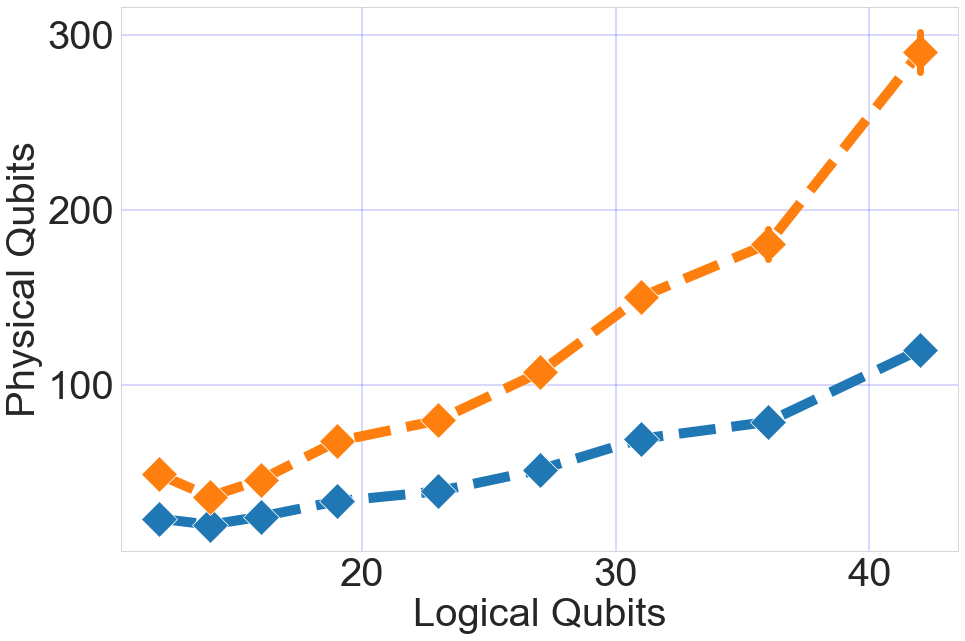

In [9]:
figname = f'knapsack_annealing_qubits_needed.png'
factor=5
fig, ax = plt.subplots(1,1,figsize=(15,10))
sns.lineplot(data=df, x="logical_qubits", y="qubits_needed", ax=ax, hue= 'type', hue_order=hue_order, ci = "sd", err_style="bars", marker='D',
            linewidth=2*factor,markersize=5*factor, linestyle='dashed', err_kws={"elinewidth": 7})

ax.set_xlabel('Logical Qubits', fontsize=8*factor)
ax.set_ylabel(f'Physical Qubits', fontsize=8*factor)
ax.legend( fontsize=8*factor) # loc="upper right",
# change the line width for the legend
for line in ax.legend_.get_lines():
    line.set_linewidth(7.0)
for h in ax.legend_.legendHandles:
    h.set_marker('D')
    h.set_markersize(26)
ax.grid(color='b', linestyle='-', linewidth=0.3)
ax.tick_params(axis='both', which='major', labelsize=8*factor)
if legend_flag is False:
    ax.get_legend().remove()
fig.savefig(figname, bbox_inches='tight', dpi=100)

In [10]:
	#	(12, 0.09508471247553399) +- (0.0546908703706919, 0.0546908703706919)
#	#	(14, 0.06762522460964612) +- (0.04403218477644605, 0.04403218477644605)
	#	(16, 0.044698804531462494) +- (0.029619247737470388, 0.029619247737470388)
	#	(19, 0.02647234813472374) +- (0.016155131833463985, 0.016155131833463985)

color_map = {
    'D-Wave Advantage 6.1': 'RoyalBlue',
'D-Wave 2000Q': 'OrangeRed'
,'Simulated Annealing': 'YellowOrange'
, 'IHS with Sim. Anneal.': 'ForestGreen'
}
mark_map = {
    'D-Wave Advantage 6.1': 'diamond*',
'D-Wave 2000Q': 'square*'
,'Simulated Annealing': 'triangle*'
, 'IHS with Sim. Anneal.': '*'
}

def return_add_plot(values, color, mark):
    plot_string_values= [f"({x}, {mean}) +- ({std},{std}) \n" for (x, mean, std) in values]
    return  f"	\\addplot [color={color},  mark={mark}, mark size=1pt, mark options=solid, line width=1.2pt, error bars/.cd,y dir=both,y explicit] plot coordinates  {{\n{''.join(plot_string_values)} \n}};"


def get_tikz_data(df_target, x, y, hue):
    grouped = df_target.groupby([hue,x]).agg({y: ['mean', 'std']})

    group_2 = grouped.groupby(hue)

    for name, group in group_2:

        #print(name)
        x = [y for (x,y) in group.index.values]
        mean = group[y]['mean'].tolist()
        std = group[y]['std'].tolist()
        #print(list(zip(x, mean, std)))
        print(return_add_plot(list(zip(x, mean, std)), color_map[name], mark_map[name]))

In [11]:
get_tikz_data(df, "logical_qubits", "qubits_needed", "type")

	\addplot [color=OrangeRed,  mark=square*, mark size=1pt, mark options=solid, line width=1.2pt, error bars/.cd,y dir=both,y explicit] plot coordinates  {
(12, 49.0) +- (1.2472191289246473,1.2472191289246473) 
(14, 36.4) +- (0.699205898780101,0.699205898780101) 
(16, 45.9) +- (1.4491376746189437,1.4491376746189437) 
(19, 67.9) +- (3.381321240777536,3.381321240777536) 
(23, 79.9) +- (4.433458644845526,4.433458644845526) 
(27, 107.3) +- (4.3474130238568325,4.3474130238568325) 
(31, 150.4) +- (5.460972644339303,5.460972644339303) 
(36, 180.6) +- (8.809086218218095,8.809086218218095) 
(42, 290.2) +- (11.593101396951555,11.593101396951555) 
 
};
	\addplot [color=RoyalBlue,  mark=diamond*, mark size=1pt, mark options=solid, line width=1.2pt, error bars/.cd,y dir=both,y explicit] plot coordinates  {
(12, 23.8) +- (0.7888106377466154,0.7888106377466154) 
(14, 20.3) +- (0.6749485577105525,0.6749485577105525) 
(16, 24.9) +- (1.1972189997378642,1.1972189997378642) 
(19, 33.7) +- (1.766981104093143